In [1]:
'''
進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，
爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖
'''
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = "utf-8"
html = BeautifulSoup(resp.text,"lxml")
rate_table = html.find(name="table",attrs={"title":"牌告匯率"}).find(name="tbody").find_all(name="tr")

#抓取美金
currency = rate_table[0].find(name="div",attrs={"class":"visible-phone print_hide"})
#print(currency.get_text().replace(" ",""))

#抓取美金歷史匯率首頁
history_link = rate_table[0].find(name="td",attrs={"data-table":"歷史匯率"})
history_rate_link = "https://rate.bot.com.tw/" + history_link.a["href"]
#print(history_rate_link)

# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料

quote_history_url = history_rate_link.replace("history","quote/2020-05")
resp1 = requests.get(quote_history_url)
resp1.encoding = "utf-8"
history = BeautifulSoup(resp1.text,"lxml")
history_table = history.find(name="table",attrs={"title":"歷史本行營業時間牌告匯率"}).find(name="tbody").find_all(name="tr")
#print(history_table)

#彙整資料會出圖形
date_history = []
history_buy = []
history_sell = []

#在這題的題目，
for history_rate in history_table:
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%m/%d').strftime('%Y/%m/%d')
    date_history.append(date)
    #print(date_history)
    
    history_ex_rate = history_rate.find_all(name="td",attrs={"class":"rate-content-cash text-right print_table-cell"})
    history_buy.append(float(history_ex_rate[0].get_text()))
    history_sell.append(float(history_ex_rate[1].get_text()))
#print(type(history_buy))


<Figure size 720x576 with 0 Axes>

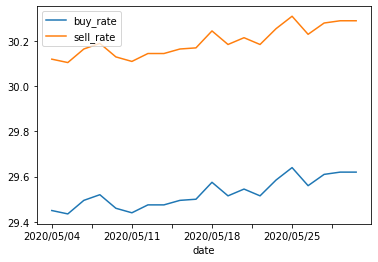

In [6]:
#繪圖方式用解答的
# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

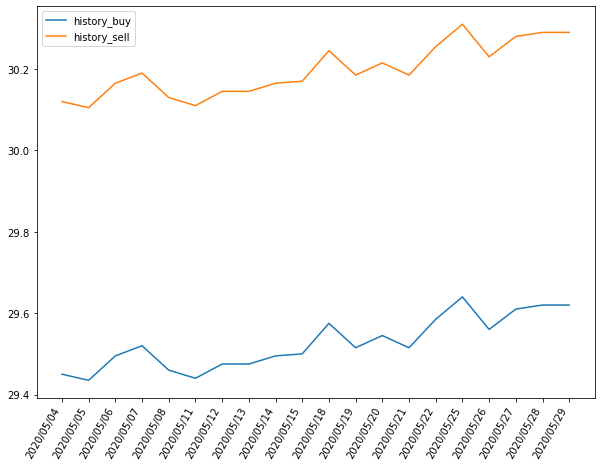

In [5]:
#繪圖方式用課本的
history_date = {"date":date_history,"history_buy":history_buy,"history_sell":history_sell}
HistoryExchangeRate = pd.DataFrame(history_date)
#原本排序反序,sort_values改為正序
HistoryExchangeRate = HistoryExchangeRate.sort_values("date")


x = HistoryExchangeRate["date"]
y = HistoryExchangeRate["history_buy"]
y1 = HistoryExchangeRate["history_sell"]

fig = plt.figure(figsize=(10,8))
buy = plt.plot(x,y,label="history_buy")
sell = plt.plot(x,y1,label="history_sell")

fig.autofmt_xdate(rotation=60)
plt.legend(loc="upper left")
'''
#刪除x軸日期
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
'''
plt.show()